# Table of Contents
 <p><div class="lev1"><a href="#Práctica-2"><span class="toc-item-num">1&nbsp;&nbsp;</span>Práctica 2</a></div><div class="lev2"><a href="#Análisis-del-tráfico-de-la-red"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Análisis del tráfico de la red</a></div><div class="lev3"><a href="#Descripción-de-los-datos"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Descripción de los datos</a></div><div class="lev1"><a href="#Ejercicios"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ejercicios</a></div><div class="lev2"><a href="#Website-fingerprinting"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><em>Website fingerprinting</em></a></div><div class="lev2"><a href="#Importància-de-les-característiques"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importancia de las catacterísticas</a></div><div class="lev2"><a href="#Avaluación-del-ataque-sobre-Tor"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Avaluación del ataque sobre Tor</a></div><div class="lev2"><a href="#Características-del-volumen-del-tráfico"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Características del volumen del tráfico</a></div><div class="lev2"><a href="#Efectividad-del-ataque-por-página"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Efectividad del ataque por página</a></div><div class="lev2"><a href="#Esquemas-de-padding"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Esquemas de <em>padding</em></a></div><div class="lev2"><a href="#Medidas-de-overhead"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Medidas de overhead</a></div>

<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M1.871 · Privacidad</p>
    <p style="margin: 0; text-align:right;">Máster Universitario en Ciberseguridad y Privacidad</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Práctica 2

---

Para resolver esta práctica, tenéis que poner las soluciones en el mismo notebook, en las celdas de código que están en blanco habilitadas para ello. Después de cada celda de código podéis poner una celda markdown en donde podéis justificar vuestra respuesta. No es obligatorio, pero sí muy recomendable que justifiquéis las respuestas que
dais, ya que eso facilita la corrección en caso de una respuesta incorrecta (pudiendo valorar el planteamiento), y puede ayudar a descartar posibles sospechas sobre copias.

En muchos casos, cuando se pide implementar una función, se proporciona el nombre de la función y los parámetros, indicado como ayuda el tipo de dichos parámetros y el tipo que retorna la función en forma de type hint. Es necesario
que respetéis el nombre de la función y, en la medida de los posible, los tipos. Sin embargo podéis implementar el código de la función con total libertad. Podéis definir otras funciones y no respetar del todo los type hints si así lo consideráis oportuno. Dicha indicación sobre la definición de la función aparece comentada para evitar errores de compilación.

Este notebook va acompañado de un cuestionario online con preguntas sobre los ejercicios y sobre temas relacionados. Este cuestionario debe ser contestado antes de la fecha de entrega de la práctica. Antes de contestar el cuestionario, tenéis que haber intentado hacer y entender todos los ejercicios.

En la carpeta `data` de este repositorio encontraréis conjuntos de datos intermedios en caso de que os quedéis atascados. Estos datos también pueden ser útiles para contestar el cuestionario si no se ha podido acabar o no se ha sabido implementar todos los ejercicios de este notebook.


Análisis del tráfico de la red
-----------------------------------------------------

---

Hemos caputrado el tráfico de la red generado por una série de visitas a páginas web. Las páginas seleccionadas son 10 de las páginas más populares según el ranking de [Alexa](https://alexa.com). Cada página ha estado visitada 100 veces con Firefox y 100 veces con el navegador de Tor (una versión modificada de Firefox) a través de la red de Tor. Todas las visitas se hicieron el dia 04-05-2021.

Las capturas del tráfico se han procesado para que solo incluyan aquellos paquetes de la red que sean relevantes (el tráfico TCP que ha generado el navegador) y descartar cualquier otro tráfico (p.e., tráfico generado por otras aplicaciones). Además, se han descartado retransmisiones y paquetes TCP vacíos (p.e., ACKs). Finalmente, de cada paquete, extraemos el tamaño de los datos y el _timestamp_ del instante en qué se envió o recibio. El contenido de los datos no es útil para hacer análisis del tráfico ya que está encriptado y suponemos que el atacante es un adversario local y pasivo que no puede desencriptar los datos.


### Descripción de los datos

Podéis descargar los datos utilizando el siguiente enlace:

https://drive.google.com/drive/folders/10hb5Qf3trwX5FZOMFEVHgYaWQverHIng?usp=sharing

Tenéis que descomprimir los contenidos de los archivos dentro de la carpeta `data` del repositorio. Los ficheros (una vez descomprimidos) son: `web_traffic.csv` y `tor_traffic.csv`, para el tráfico web y de Tor, respectivamente.

Cada fila del fichero corresponde a un único paquete TCP. Las columnas son los siguientes atributos del tráfico:


 | Nombre | Descripción |
 | --- | --- |
 | `website` | El nombre de la página la visita de la cual ha generado el paquete. |
 | `instance` | El índice de la visita (del 0 al 99). |
 | `timestamp` | El instante en el que se ha visitado o enviado el paquete. |
 | `length` | El tamaño de los datos del paquete en bytes. El signo codifica la dirección del paquete: negativo para paquetes recibidos ("_incoming_") y positivo para paquetes enviados ("_outgoing_"). |
 
Llamamos "traza" o "captura" a una secuencia de paquetes generados por una visita a una página. El atributo `instance` indexa las trazas de un website (hay 100 visitas por tanto obtenemos 100 trazas). Una traza se identifica de manera única con la tupla (`website`, `instance`) en el dataframe.
 
La lista de las páginas visitadas es:

  - bing.com
  - wikipedia.org
  - nytimes.com
  - youtube.com
  - amazon.com
  - netflix.com
  - reddit.com
  - vk.com
  - twitter.com
  - panda.tv

Antes de nada carguemos los conjuntos de datos en memoria:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# fix numpy's rng seed for reproducibility
np.random.seed(0) 


# shortcut to get website labels from dataframe
def labels(df):
    return df.index.get_level_values('website')

In [2]:
# load web data
web = pd.read_csv('data/web_traffic.csv')
tor = pd.read_csv('data/tor_traffic.csv')

In [3]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788997 entries, 0 to 3788996
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   website    object 
 1   instance   int64  
 2   timestamp  float64
 3   length     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 115.6+ MB


In [4]:
tor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4262621 entries, 0 to 4262620
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   website    object 
 1   instance   int64  
 2   timestamp  float64
 3   length     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 130.1+ MB


# Ejercicios

## _Website fingerprinting_

Para empezar, implementaréis un ataque de _website fingerprinting_ muy sencillo. Como habréis leído en los materiales de la asignatura, un ataque de _website fingerprinting_ considera un adversario que observa el tráfico de la red en un punto intermedio entre el cliente y el servidor web (p.e., un router del proveedor de servicios de Internet). El el caso de Tor, el adversario se encuentra entre el cliente y el primer nodo de la red de Tor, tal com se muestra en la siguiente figura:

<img src="https://www.ehacking.net/wp-content/uploads/2016/02/fingerprintingtor.jpg" alt="Posició de l'adversari" style="width: 500px;"><center>Fig. 1. Posició de l'adversari en l'escenari de Tor.</center></img>

La mayoría de los ataques de _website fingerprinting_ utilizan clasificadores automáticos para inferir la página que se ha visitado a partir del tráfico encriptado. Los clasificadores toman como *características*, las propiedades del tráfico que son más relevantes y, como *clases*, los nombres de dichas páginas. Por tanto, la aplicación de un ataque en la práctica sigue los siguientes pasos:

1. El atacante recoge  datos a través de su navegador. El atacante utiliza el sistema que la víctima utiliza: p.e., si la víctima utiliza Tor, el adversario recoge los datos a través de Tor. Por tanto, los conjunto de datos que os damos corresponden a dos escenarios distintos donde se aplica el ataque.
2. Extracción de un conjunto de características del tráfico que sean identificativas de las páginas. Una característica es identificativa si toma valores _diferentes_ para visitas a páginas distintas pero toma valores _parecidos_ para visitas a la misma página.
3. Entrenamiento de un clasificador con el conjunto de características junto con las clases a las cuales pertenecen. Los valores de las clases en el conjunto de entrenamiento (es decir, lo nombres de las páginas) también se conocen como "etiquetas", ya que representa que el atacante las ha etiquetado en el punto 1.
4.Aplicación del clasificador a una traza recogida de la víctima. Se extraen las características otra vez y se utiliza el clasificador para inferir la clase a la que pertenece. En esta práctica, este paso se relizará sobre un conjunto de datos que apartaremos con antelación (conjunto de evaluación) para medir la efectividad del ataque.

Podéis encontrar más detalles sobre _website fingerprinting_ en los materiales de la asignatura.

**Ejercicio 1** [5%]

**a.** [4%] Extraed el siguiente conjunto de características *para cada traza* del conjunto de datos `web`:

 | Nombre | Descripción |
 | --- | --- |
 | `max_in_size` | El tamaño máximo de un paquete recibido. |
 | `min_in_size` | El tamaño mínimo de un paquete recibido. |
 | `max_out_size` | El tamaño máximo de un paquete enviado. |
 | `min_out_size` | El tamaño mínimo de un paquete enviado. |
 | `mean_in_size` | El tamaño medio de un paquete recibido. |
 | `mean_out_size` | El tamaño medio de un paquete enviado. |

- Haced uso del método `agg` sobre el dataframe para aplicar los métodos de extracción de las características. Ved el siguiente ejemplo que extrae el tamaño máximo de una traza:

```py
# Group by trace
groupby_trace = web.groupby(['website', 'instance'])

# Define the feature methods. The syntax is: `"<feature name>": ("<column name>", <method>)`
# That is, apply <method> on the column with name <column name> and name the result as <feature name>
feature_methods = {"max_size": ('length', lambda x: x.max())}

# Apply the methods to extract the features
web_features = groupby_trace.agg(**feature_methods)
    
```

De hecho, podríamos haber pasado el método `max` directamente:

```py
features_methods = {"max_size": ('length', max)}
```

In [5]:
# TODO: extract features from the data:
gbt = web.groupby(['website','instance']) # Agrupamos por sitio e instancia
# Valores negativos. Necesitamos valores absolutos
fm1 = {"max_in_size": ('length', lambda x: abs(x[x<0].min()))} # Mínimo
fm2 = {"min_in_size": ('length', lambda x: abs(x[x<0].max()))} # Máximo
fm5 = {"mean_in_size": ('length', lambda x: abs(x[x<0].mean()))} # Media
# Valores positivos
fm3 = {"max_out_size": ('length', lambda x: x[x>0].max())} # Máximo
fm4 = {"min_out_size": ('length', lambda x: x[x>0].min())} # Mínimo
fm6 = {"mean_out_size": ('length', lambda x: x[x>0].mean())} # Media
wf = gbt.agg(**fm1, **fm2, **fm3, **fm4, **fm5, **fm6)

**b.** [1%] A continuación tendréis que entrenar un **árbol de decisión** con el conjunto de características que habéis obtenido.

Utilizad el módulo de Python `sklearn`. La clase que necesitáis es [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). En la documentación de `sklearn` encontraréis muchos ejemplos de como entrenar y evaluar un modelo de clasificación. Para tener una visión global sobre el entrenamiento de modelos con `sklearn` podéis consultar el siguiente tutorial:

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

Nosotros os recomendamos que hagáis uso del método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) de `sklearn` el cual aplica [_k-fold cross-valiation_](https://scikit-learn.org/stable/modules/cross_validation.html). _k-fold cross-validation_ hace múltiples particiones de los conjuntos de datos para entrenar y evaluar el modelo en diferentes muestras de los datos. Por tanto, con _k-fold cross-validation_, se obtienen _mejores_ mediciones del rendimiento del clasificador en la práctica (y, por tanto, del ataque) que si utilizasemos un conjunto fijo de los datos. Los valores de los parámetros que debéis pasar a `cross_val_score` son: 

 | Nombre | Descripción |
 | --- | --- |
 | `estimator` | La instancia del clasificador. |
 | `X` | El conjunto de características sin las etiquetas (nombres de las páginas). Cada fila de `X` corresponde a los valores de las características que hemos extraído de la traza, llamada `instancia` de entrenamiento en el contexto de clasificación.
 | `y`| El conjunto de etiquetas. La $i$-ésima fila de `y` es el nombre de la página que corresponde a la $i$-ésima instancia de `X`.
 | `cv` | El número de particiones. Es la $k$ en `k-fold`. Utilizaréis 5 particiones.|
 | `scoring` | La función para medir el rendimiento del clasificador.  Utilitzad `recall_macro`.|
 | `random_state`| La semilla del generador de números aleatorios. Fijad-lo a 0. | 
 
El ["_recall_"](https://en.wikipedia.org/wiki/Precision_and_recall) es la rátio  la ratio de positivos verdaderos y mide la probabilidad de acierto del ataque. Solo es necesario que mostréis la media de la lista de valores que devuelve el método de _cross-validation_.
 
Sea cual sea el método que escogés, recordad fijar la semilla del generador de números aleatorios a `0` utilizando el parámetro `random_state` de los métodos que tienen aleatoriedad (p.e., cuando se instancia la clase `DecisionTreeClassifier`).

Podéis utilizar el método `labels` definido en la primera celda de este notebook para extraer las etiquetas del dataframe con las características.

In [6]:
from sklearn import tree

In [7]:
# TODO: train and test the decision tree with 5-fold cross-validation. Report the mean Recall:
from sklearn.model_selection import cross_val_score
dst1 = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0)
cross_val_score(dst1, wf, labels(wf), cv = 5, scoring = "recall_macro").mean()

0.7380000000000001

## Importancia de las características

**Ejercicio 2** [5%]

El entrenamiento de un árbol de decisión consiste en dividir el conjunto de datos de entrenamiento según los valores de sus características. Estas particiones se calculan maximizando una función que mide la calidad de una partición.

Una ventaja de esto es que el orden de una característica en el árbol de decisión se puede interpretar como una medida de la `importancia` relativa de la característica para resolver el problema de clasificación. En nuestro caso: como de efectiva es la característica en distinguir una página a partir de su tráfico.

En particular, la característica en el primer nivel del árbol es la característica que se ha utilizado para la primera partición de los datos y que, por tanto, _revela más información_ sobre las páginas.

Una vez entrenado, para inferir la clase de una instancia del conjunto de evaluación, se sigue cada nodo del árbol según los valores de sus características hasta llegar a las hojas del árbol, las cuales indican la clase.

Utilizad el método de `sklearn`: [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para visualizar el árbol de decisión. Observad cuales han sido las características más importantes (en los primeros niveles del árbol).

Para hacer caber la figura del árbol dentro de la celda, limitad el número de niveles del árbol a tres niveles. Para eso, instanciad un nuevo árbol de clasificación con `max_depth=3` y entrenadlo. Además, podéis modificar el parámetro `font_size` en `plot_tree` y del tamaño de la figura (`figsize`) para acabar de ajustar la figura a la celda.

[Text(708.2307692307693, 475.65000000000003, 'X[2] <= 1444.0\ngini = 0.9\nsamples = 1000\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]'),
 Text(377.723076923077, 339.75, 'X[0] <= 1454.0\ngini = 0.858\nsamples = 699\nvalue = [1, 100, 98, 1, 100, 0, 99, 100, 100, 100]'),
 Text(188.8615384615385, 203.85000000000002, 'X[2] <= 1064.0\ngini = 0.801\nsamples = 486\nvalue = [0, 2, 89, 0, 0, 0, 99, 98, 98, 100]'),
 Text(94.43076923076924, 67.94999999999999, 'gini = 0.761\nsamples = 383\nvalue = [0, 2, 89, 0, 0, 0, 92, 7, 98, 95]'),
 Text(283.29230769230776, 67.94999999999999, 'gini = 0.212\nsamples = 103\nvalue = [0, 0, 0, 0, 0, 0, 7, 91, 0, 5]'),
 Text(566.5846153846155, 203.85000000000002, 'X[1] <= 7.0\ngini = 0.566\nsamples = 213\nvalue = [1, 98, 9, 1, 100, 0, 0, 2, 2, 0]'),
 Text(472.1538461538462, 67.94999999999999, 'gini = 0.057\nsamples = 103\nvalue = [0, 3, 0, 0, 100, 0, 0, 0, 0, 0]'),
 Text(661.0153846153847, 67.94999999999999, 'gini = 0.247\nsamples = 110\nvalue = [1, 95

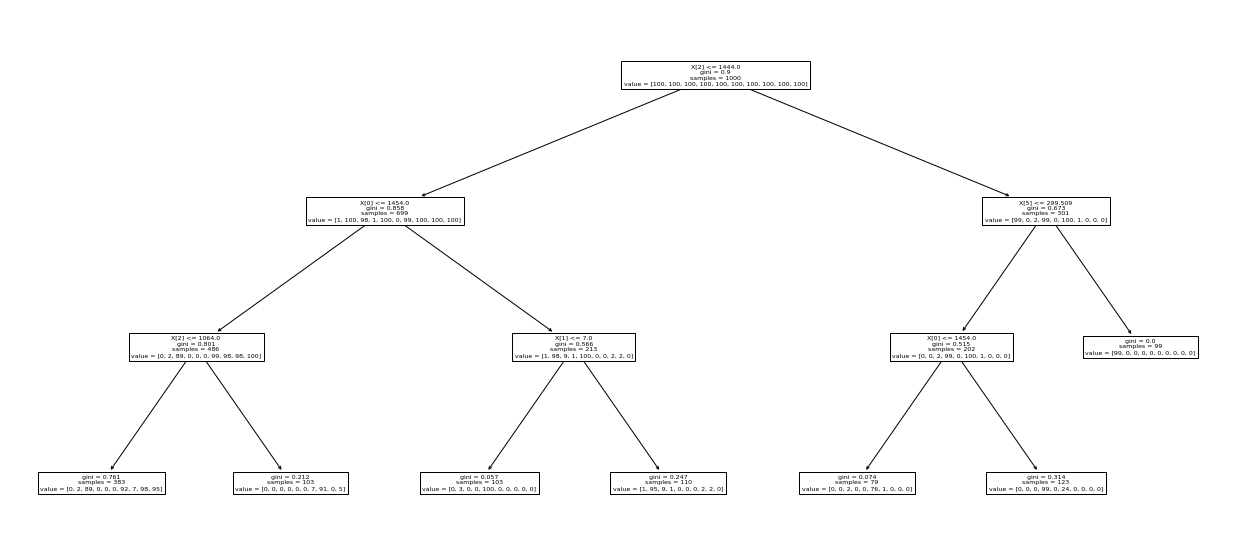

In [8]:
fig = plt.figure(figsize=(22, 10))
# TODO: plot a tree with three levels:
dst2 = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
cross_val_score(dst2, wf, labels(wf), cv = 5, scoring = "recall_macro").mean()
dst2.fit(wf, labels(wf))
tree.plot_tree(dst2)

## Avaluación del ataque sobre Tor

**Ejercicio 3** [10%]

**a.** [3%] Extraed las características para los datos de Tor y utilizadlas para entrenar y evaluar un nuevo árbol de decisión:

[Text(167.4, 190.26, 'X[5] <= 1088.698\ngini = 0.9\nsamples = 1000\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]'),
 Text(83.7, 135.9, 'X[5] <= 980.827\ngini = 0.877\nsamples = 726\nvalue = [24, 81, 94, 16, 100, 20, 98, 100, 100, 93]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 5.0\ngini = 0.755\nsamples = 213\nvalue = [9, 6, 12, 2, 77, 3, 19, 9, 66, 10]'),
 Text(20.925, 27.180000000000007, 'gini = 0.624\nsamples = 85\nvalue = [1, 1, 3, 2, 50, 0, 8, 6, 8, 6]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.73\nsamples = 128\nvalue = [8, 5, 9, 0, 27, 3, 11, 3, 58, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 1276.76\ngini = 0.863\nsamples = 513\nvalue = [15, 75, 82, 14, 23, 17, 79, 91, 34, 83]'),
 Text(104.625, 27.180000000000007, 'gini = 0.585\nsamples = 76\nvalue = [2, 2, 2, 5, 0, 0, 7, 10, 1, 47]'),
 Text(146.475, 27.180000000000007, 'gini = 0.859\nsamples = 437\nvalue = [13, 73, 80, 9, 23, 17, 72, 81, 33, 36]'),
 Text(251.10000000000002, 135.9, 

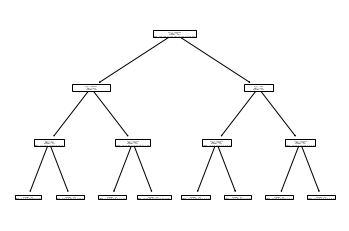

In [9]:
# TODO: extract features from tor dataset:
gbtt = tor.groupby(['website','instance'])
fm1t = {"max_in_size": ('length', lambda x: abs(x[x<0].min()))} # Neg
fm2t = {"min_in_size": ('length', lambda x: abs(x[x<0].max()))} # Neg
fm3t = {"max_out_size": ('length', lambda x: x[x>0].max())} # Pos
fm4t = {"min_out_size": ('length', lambda x: x[x>0].min())} # Pos
fm5t = {"mean_in_size": ('length', lambda x: abs(x[x<0].mean()))} # Neg
fm6t = {"mean_out_size": ('length', lambda x: x[x>0].mean())} # Pos
wft = gbtt.agg(**fm1t, **fm2t, **fm3t, **fm4t, **fm5t, **fm6t)
# TODO: train and test the decision tree with 5-fold cross-validation. Report the mean Recall:
dstt = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
cross_val_score(dstt, wft, labels(wft), cv = 5, scoring = "recall_macro").mean()
dstt.fit(wft, labels(wft))
tree.plot_tree(dstt)

**b.** [7%] A continuación, intentemos averiguar porque el ataque es menos efectivo contra Tor. Mostrad los histogramas del atributo `length`par ambos conjuntos de datos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce556e21f0>]],
      dtype=object)

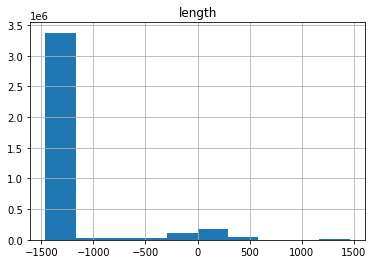

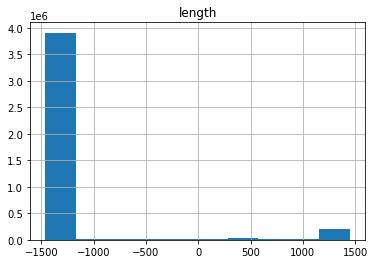

In [10]:
# TODO: plot histograms for `tor` and `web` lengths.
%matplotlib inline
web.hist(column = 'length')
tor.hist(column = 'length')

## Características del volumen del tráfico

**Ejercicio 4** [30%]

**a.** [15%] Añadid las siguientes características al conjunto de características de los ejercicios anteriores. A continuación, repetid los pasos del ejercicio anterior: extraed las características y entrenad un árbol de decisión.

Nuevas características:

 | Nombre | Descripción |
 | --- | --- |
 | `total_in_volume` | El volumen total del tráfico de entrada. Es decir, el número de bytes que se han recibido en total. |
 | `total_out_volume` | El volumen total del tráfico de salida. |
 | `packet_count` | El número total de paquetes. |
 | `load_time` | El tiempo que se ha tardado en cargar la página. |

In [11]:
# TODO: extract the union of old and new features from the web data:
fm7 = {"total_in_volume": ('length', lambda x: abs(x[x<0].sum()))}
fm8 = {"total_out_volume": ('length', lambda x: x[x>0].sum())}
fm9 = {"packet_count": ('instance', lambda x: x.count())}
fm10 = {"load_time": ('timestamp', lambda x: abs(x.max() - x.min()))}
wfwn = gbt.agg(**fm1, **fm2, **fm3, **fm4, **fm5, **fm6, **fm7, **fm8, **fm9, **fm10)

**b.** [5%] Aplicad el ataque de nuevo sobre el nuevo conjunto de características del tráfico:

In [12]:
# TODO: train and test the decision tree with 5-fold cross-validation. Report the mean Recall:
dstwn = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
cross_val_score(dstwn, wfwn, labels(wfwn), cv = 5, scoring = "recall_macro").mean()

0.493

**c.** [5%] Extraed las características de los datos de Tor y aplicad el ataque:

In [13]:
# TODO: extract new features from the tor dataset:
fm7t = {"total_in_volume": ('length', lambda x: abs(x[x<0].sum()))}
fm8t = {"total_out_volume": ('length', lambda x: x[x>0].sum())}
fm9t = {"packet_count": ('instance', lambda x: x.count())}
fm10t = {"load_time": ('timestamp', lambda x: abs(x.max() - x.min()))}
wftn = gbtt.agg(**fm1t, **fm2t, **fm3t, **fm4t, **fm5t, **fm6t, **fm7t, **fm8t, **fm9t, **fm10t)
# TODO: train and test the decision tree with 5-fold cross-validation. Report the mean Recall:
dsttn = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
cross_val_score(dsttn, wft, labels(wft), cv = 5, scoring = "recall_macro").mean()

0.36900000000000005

**d.** [5%] Mostrad la visualización del nuevo árbol de decisión para ver que característica es la más importante en los datos de Tor.

[Text(613.8000000000001, 475.65000000000003, 'X[5] <= 1088.698\ngini = 0.9\nsamples = 1000\nvalue = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]'),
 Text(306.90000000000003, 339.75, 'X[5] <= 980.827\ngini = 0.877\nsamples = 726\nvalue = [24, 81, 94, 16, 100, 20, 98, 100, 100, 93]'),
 Text(153.45000000000002, 203.85000000000002, 'X[1] <= 5.0\ngini = 0.755\nsamples = 213\nvalue = [9, 6, 12, 2, 77, 3, 19, 9, 66, 10]'),
 Text(76.72500000000001, 67.94999999999999, 'gini = 0.624\nsamples = 85\nvalue = [1, 1, 3, 2, 50, 0, 8, 6, 8, 6]'),
 Text(230.175, 67.94999999999999, 'gini = 0.73\nsamples = 128\nvalue = [8, 5, 9, 0, 27, 3, 11, 3, 58, 4]'),
 Text(460.35, 203.85000000000002, 'X[4] <= 1276.76\ngini = 0.863\nsamples = 513\nvalue = [15, 75, 82, 14, 23, 17, 79, 91, 34, 83]'),
 Text(383.62500000000006, 67.94999999999999, 'gini = 0.585\nsamples = 76\nvalue = [2, 2, 2, 5, 0, 0, 7, 10, 1, 47]'),
 Text(537.075, 67.94999999999999, 'gini = 0.859\nsamples = 437\nvalue = [13, 73, 80, 9, 23, 17, 72,

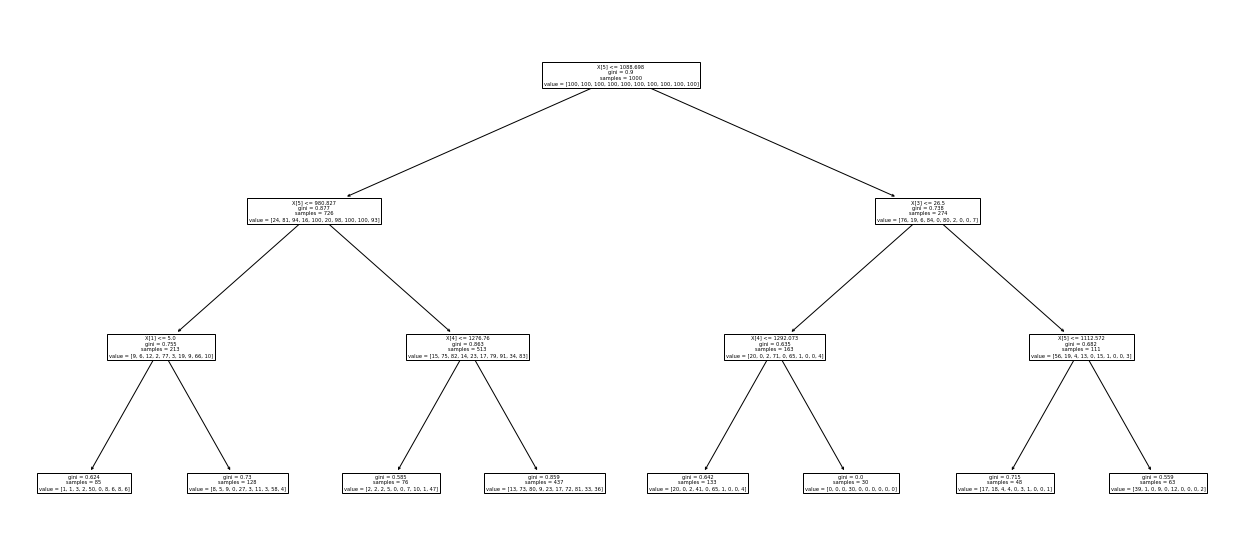

In [14]:
fig = plt.figure(figsize=(22, 10))

# TODO: plot the tree:
dsttn.fit(wft, labels(wft))
tree.plot_tree(dsttn)

## Efectividad del ataque por página

**Ejercicio 5** [10%]

La efectividad del ataque depende de la página. En este ejercicio debéis aplicar el ataque y mostrar la ratio de positivos verdaderos **por página**.

No utilicéis el método `cross_val_score`. Ahora utilizad el método [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de `sklearn` para dividir los datos entre un conjunto de entrenamiento y otro de evaluación. Entonces, llamad los métodos del clasificador [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) y [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) para entrenarlo y obtener las predicciones individuales sobre el conjunto de evaluación, respectivamente. Utilizad las predicciones del clasificador y las etiquetas reales de las instancias del conjunto de evaluación para llamar al método: [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Este método devuelve distintas medidas del rendimiento del clasificador (entre ellas el _recall_) por página.

Llamad `train_test_split` con los siguientes parámetros:

| Nombre | Descripción |
| -- | -- |
| `X`| Dataframe de les características. |
| `train_size`| Ratio del conjunto de entrenamiento respecto al total. Usad 0.75. |
| `stratify` | Nos asegura que hay el mismo número de instancias por página en los conjuntos de entrnamiento y de evaluación. Debéis pasar el conjunto de etiquetas que corresponde a `X`. |
| `random_state`| Fijad-lo a 0. |

Podéis usar el parámetro `output_dict` del método `classification_report` para obtener un diccionario que podéis convertir en un dataframe de la siguiente manera:

```py
report = classification_report(..., output_dict=True)
report pd.DataFrame(report).transpose()
display(report)
```

Las últimas tres filas del report son medidas agregadas que podéis descartar.

Por último, calculad la desviación estándard del tiempo de carga de la página y añadidla al report. Utilizad el método del dataframe `sort_values` para ordenar el dataframe según el tiempo de carga y mostrad solo las columnas correspondientes al _recall_ y a la desviación estándard del tiempo de carga.

Hacedlo solo para el conjunto de datos de Tor.

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [16]:
# TODO: obtain train and test splits
wftn_train, wftn_test = train_test_split(wftn, train_size=0.75, stratify = labels(wftn), random_state = 0)
# TODO: train classifier and predict classes for the test set
wftn_train_t = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
wftn_train_t.fit(wftn_train, labels(wftn_train))
wftn_test_t = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
wftn_test_t_p = wftn_test_t.fit(wftn_test, labels(wftn_test)).predict(wftn)
# TODO: display report
report = classification_report(labels(wftn), wftn_test_t_p, output_dict = True, zero_division = 0)
report = pd.DataFrame(report).transpose()
display(report)
# TODO: add and show the load time's stdev next to recall
wftn_n = wftn.groupby(['website'])
fm12t = {"std(load_time)": ('load_time', lambda x: x.std())} # Calculo de la desviacion estandar
wftn_std = wftn_n.agg(**fm12t)
report['std(load_time)'] = wftn_std # Agregado de columna
display(report[['recall', 'std(load_time)']].sort_values('std(load_time)')) # Ordenado y presentacion

,precision,recall,f1-score,support
amazon,0.000000,0.000,0.000000,100.000
bing,0.555556,1.000,0.714286,100.000
netflix,0.000000,0.000,0.000000,100.000
nytimes,0.697479,0.830,0.757991,100.000
panda,0.760870,0.700,0.729167,100.000
reddit,0.776316,0.590,0.670455,100.000
twitter,0.240695,0.970,0.385686,100.000
vk,0.000000,0.000,0.000000,100.000
wikipedia,0.661538,0.860,0.747826,100.000
youtube,0.000000,0.000,0.000000,100.000


,recall,std(load_time)
bing,1.000,2.779367
amazon,0.000,4.889737
twitter,0.970,5.168332
youtube,0.000,5.296512
vk,0.000,5.825427
wikipedia,0.860,6.471995
netflix,0.000,8.864859
panda,0.700,9.409968
reddit,0.590,11.145516
nytimes,0.830,14.911798


## Esquemas de _padding_

**Ejercicio 6** [25%]

En este ejercicio, debéis implementar y evaluar un esquema de _padding_ del tráfico. El _padding_ se simulará sobre los datos. Es decir, deberéis implementar un método que tome un dataframe y devuelva el dataframe con el _padding_. El esquema es el siguiente:
 
 - **_Padding_ al siguiente múltiple**: dado un parámetro $\alpha$ que indica un número de paquetes fijo, añadimos paquetes a cada traza hasta alcanzar el siguiente múltiplo de $\alpha$. Por ejemplo, si $\alpha=200$ y hay 345 paquetes en la traza, debemos añadir 145 paquetes.
 
Como resultado, el esquema crea conjuntos de anonimato respecto a la característica: página que tenían números de paquetes parecidos pasan a tener el mismo número de paquetes. Encontraréis más informació sobre las definiciones de conjunto de anonimato y _padding_ en los materiales de la asignatura.

Para las simulaciones haremos las siguientes suposiciones:

 - Supondremos que también se añade _padding_ a nivel de paquete, de manera que ** todos los paquetes de la traza** acabaran teniendo el mismo tamaño: 1460 bytes.
 
 - Los nuevos paquetes que se añaden son paquetes recibidos.
 
 - Para simular los tiempos de los paquetes de _padding_, supondremos que los tiempos del _padding_ están distribuidos siguiendo una distribución [`beta`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) con los parámetros estimados (con máxima verosimilitud) a partir de los datos:

```py
# MLE estimate from data
delays = tor.timestamp.diff()
params = beta.fit(delays.dropna())
```

Vosotros no tenéis que estimar los parámetros. Os proporcionamos los datos que debéis utilizar para los tiempos en la siguiente celda:

In [17]:
from scipy.stats import beta
PACKET_SIZE      = 1460
TIMESTAMP_PARAMS = (0.6961851058342148, 172.0499069713989, 9.536743164062499e-07, 5.721616484081675)

**a.** [15%] Implementad los métodos par añadir _padding_:

In [109]:
# TODO: implement padding method:

def get_padding_to(df: pd.DataFrame) -> int:
    # Calculo del relleno del numero de paquetes
    df_gb = df.groupby(['website', 'instance'])
    pc = {"packet_count": ('instance', lambda x: x.count())}
    df_a = df_gb.agg(**pc)
    
    return(df_a['packet_count'].max() + 1)

def get_traces(df: pd.DataFrame) -> pd.DataFrame:
    # Lista de trazas
    df_traces = df[['website', 'instance']].drop_duplicates()
    
    return(df_traces)
    
    #for i, row in df.iterrows():
    #    print(i, end='\r')
    #    trace = row[0] + " " + str(row[1])
    #    if trace not in traces:
    #        traces.append(trace)
    print(len(traces))

def next_multiple_padding(trace: pd.DataFrame, a: int) -> pd.DataFrame:
    """Return the padded trace."""
    # TODO
        
    sample_packet = trace.iloc[0]
    fake_packet = pd.DataFrame(columns=["website", "instance", "timestamp", "length"])
    fake_packet = fake_packet.append(sample_packet, ignore_index = True)
    print("Paquete falso: ", end = "")
    print(fake_packet.to_string(header = False))
    print("Cantidad de paquetes falsos: ", end = "")
    print(a - 1000 % a)
    fake_trace = pd.concat([fake_packet]*(a - 1000 % a), ignore_index = True)
    
    padded_trace_gb = trace.groupby(['website', 'instance'])
    pc = {"packet_count": ('instance', lambda x: x.count())}
    padded_trace_a = padded_trace_gb.agg(**pc)
    
    return(trace)
    pass

padded_tor = next_multiple_padding(tor, get_padding_to(tor))
#display(get_traces(tor))
#display(padded_tor)

#tor_p_padded = tor.copy()
#tor_p_padded.length = tor_p_padded.length.mask(tor_p_padded.length.lt(0), -PACKET_SIZE)
#tor_p_padded.length = tor_p_padded.length.mask(tor_p_padded.length.gt(0), PACKET_SIZE)
#tor_p_padded.to_csv('test.csv')
#display(tor_p_padded)
#tor_gb = tor.groupby(['website', 'instance'])
#for key, item in tor_gb:
#    print(tor_gb.get_group(key))

Paquete falso: 0  bing  55  1.620084e+09  -1298
Cantidad de paquetes falsos: 23159


**b.** [5%] Aplicad el esquema de _padding_ donde $\alpha$ es el número de paquetes máximo de todas las trazas de Tor **más 1**.

In [19]:
# TODO: apply padding on Tor traces where `a`is the max num of packets + 1:
# Hint: use the apply method on the tortrace groupby.


**c.** [4%] Extraed las características y mostrad el dataframe resultante:

In [20]:
#TODO: extract features and show dataframe:


**d.** [1%] Entrenad y evaluad el árbol de decisión con las nuevas características:

In [21]:
# TODO: train and test the decision tree classifier with the features from the padded data:


## Medidas de _overhead_

**Ejercicio 7** [15%]

Si $X$ es el conjunto de los datos original, $X'$ el conjunt de datos con el _padding_, y $f$ una función que mide una propiedad de los datos (p.e., latencia, volumen). Entonces, definimos el [_overhead_](https://en.wikipedia.org/wiki/Overhead_(computing)) de la siguiente forma:

$$\mbox{Overhead(f, X, X')} = \frac{f(X')}{f(X)}$$


Por ejemplo, si $f$ mide el ancho de banda de la comunicación, la interpretación de _Overhead_(f, X, X') es _cuantas veces más_ ancho de banda se ha utilitzado el el escenario con el _padding_ respecto al escenario sin _padding_.


**a.** [10%] Implementad métodos que miden el _overhead_ cuando $f$ mide:

 1. El volumen de entrada de la comunicación en bytes.
 2. La latencia (tiempo de carga de la página).

**Recomendación**: Hacedlo suponiendo que los dataframes que reciben los métodos son los dataframes de las características y no los dataframes con el tráfico.

In [22]:
# TODO: implement overhead methods:

def overhead_volume(original: pd.DataFrame, padded: pd.DataFrame) -> float:
    """Return of volume overhead of padded over original."""
    #TODO
    pass


def overhead_latency(original: pd.DataFrame, padded: pd.DataFrame) -> float:
    """Return letency overhead of padded over original."""
    #TODO
    pass

**b.** [5%] Calculad los _overheads_ para el esquema de _padding_ del ejercicio anterior.

In [23]:
# TODO: ompute overheads:
